In [1]:
import matplotlib.pyplot as plt

def plot(*filenames):
    time_cut = [0]
    is_one_file = len(filenames) == 1
    for filename in filenames:          
        ## open file
        with open(filename) as f:
            lines = f.readlines()
        x_column = []
        y_column = []
        ylabel_1,ylabel_2 = "",""
        ## read lines to info
        for line in lines:
            if line[0] == "#": ## comment
                pass 
            elif line[0] == "@": ## plot infomation
                split = line.split()
                # print(split)
                if split[1] == "title":
                    title = " ".join(split[2:]).replace("\"","")
                elif split[1] == "xaxis":
                    xlabel = " ".join(split[3:]).replace("\"","")
                elif split[1] == "yaxis":
                    ylabel_2 = " ".join(split[3:]).replace("\"","")
                elif split[1] == "view":
                    pass
                elif split[1] == "legend":
                    pass
                elif split[1] == "s0":
                    ylabel_1 = split[3].replace("\"","")
            elif line[0] == " ": ## x-y axis data
                split = line.split()
                x_column.append(float(split[0])+time_cut[-1])
                y_column.append(float(split[1]))
        label_name = filename.split('/')[-1].split('.')[0]+"_"+ylabel_1
        if is_one_file:
            plt.plot(x_column,y_column,label=label_name,color='black')
        else:
            plt.plot(x_column,y_column,label=label_name)
        time_cut.append(max(x_column))
    
    ## plot 
    ymin, ymax = plt.gca().get_ylim()
    if not is_one_file:
        plt.plot([time_cut[1:-1],time_cut[1:-1]],[ymin,ymax],linestyle="--",color='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel_1 + " " + ylabel_2)
    plt.legend()
    plt.ticklabel_format(style='sci',scilimits=(-3,3),axis='y')
    plt.show()


In [2]:
import matplotlib.pyplot as plt

def distribution(*filenames):
    time_cut = [0]
    is_one_file = len(filenames) == 1
    for filename in filenames:          
        ## open file
        with open(filename) as f:
            lines = f.readlines()
        x_column = []
        y_column = []
        ylabel_1,ylabel_2 = "",""
        ## read lines to info
        for line in lines:
            if line[0] == "#": ## comment
                pass 
            elif line[0] == "@": ## plot infomation
                split = line.split()
                # print(split)
                if split[1] == "title":
                    title = " ".join(split[2:]).replace("\"","")
                elif split[1] == "xaxis":
                    xlabel = " ".join(split[3:]).replace("\"","")
                elif split[1] == "yaxis":
                    ylabel_2 = " ".join(split[3:]).replace("\"","")
                elif split[1] == "view":
                    pass
                elif split[1] == "legend":
                    pass
                elif split[1] == "s0":
                    ylabel_1 = split[3].replace("\"","")
            elif line[0] == " ": ## x-y axis data
                split = line.split()
                x_column.append(float(split[0])+time_cut[-1])
                y_column.append(float(split[1]))
        label_name = filename.split('/')[-1].split('.')[0]+"_"+ylabel_1
        if is_one_file:
            plt.hist(y_column,label=label_name,color='black',bins=50)
        else:
            plt.bar(x_column,y_column,label=label_name,bins=50)
        time_cut.append(max(x_column))
    
    ## plot 
    ymin, ymax = plt.gca().get_ylim()
    if not is_one_file:
        plt.plot([time_cut[1:-1],time_cut[1:-1]],[ymin,ymax],linestyle="--",color='black')
    plt.title(title)
    plt.xlabel(ylabel_1 + " " + ylabel_2)
    # plt.ylabel()
    plt.legend()
    plt.ticklabel_format(style='sci',scilimits=(-3,3),axis='y')
    plt.show()

### energy minimization
sele 11(Potential)

In [3]:
!echo "11" | gmx energy -f min1.edr -o min1.e.xvg
!echo "11" | gmx energy -f min2.edr -o min2.e.xvg

                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /home/user/opt/gromacs-2023/bin/gmx
Data prefix:  /home/user/opt/gromacs-2023
Working dir:  /home/user/workfolder/g4dna_protocol/hybrid-ii/c.gromacs.run_md/1.create_system
Command line:
  gmx energy -f min1.edr -o min1.e.xvg

Opened min1.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Coul.-recip.    10  Position-Rest.  11  Potential       12  Pressure      
 13  Vir-XX          14  Vir-XY          15  Vir-XZ          16  Vir-YX        
 17  Vir-YY          18  Vir-YZ          19  Vir-ZX          20  Vir-ZY        
 21  Vir-ZZ  

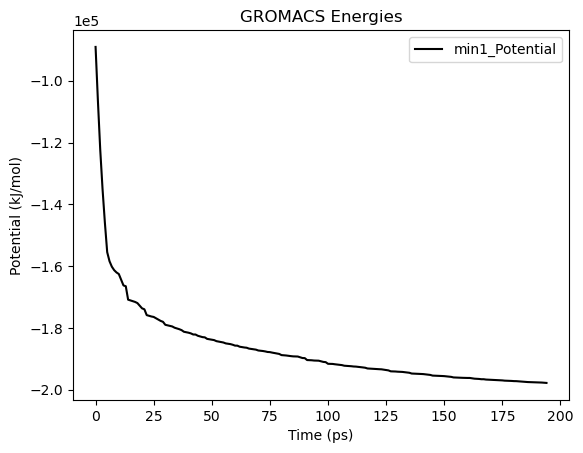

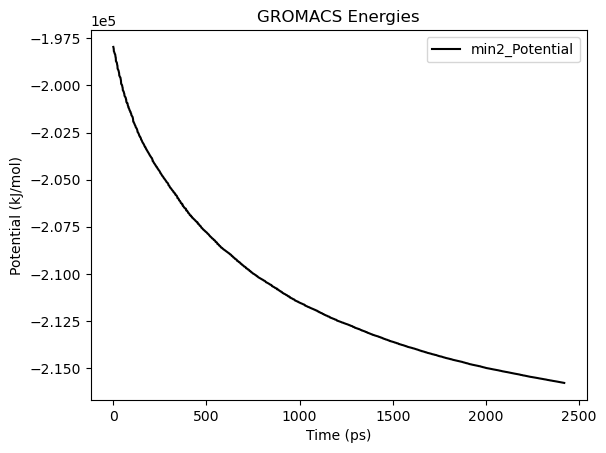

In [4]:
plot("min1.e.xvg")
plot("min2.e.xvg")

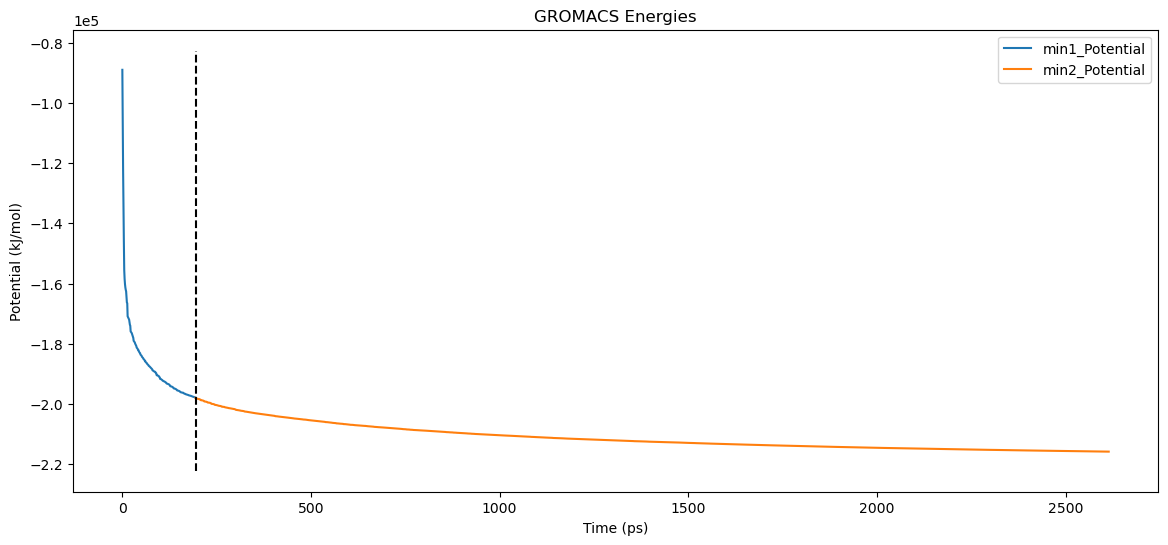

In [5]:
plt.figure(figsize=(14, 6))
plot("min1.e.xvg","min2.e.xvg")

### temperature changing for heating
select 15(Temperature)  
select 17(Pressure)  

In [6]:
!echo "15" | gmx energy -f heat.edr -o heat.t.xvg 
!echo "17" | gmx energy -f heat.edr -o heat.p.xvg 

                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /home/user/opt/gromacs-2023/bin/gmx
Data prefix:  /home/user/opt/gromacs-2023
Working dir:  /home/user/workfolder/g4dna_protocol/hybrid-ii/c.gromacs.run_md/1.create_system
Command line:
  gmx energy -f heat.edr -o heat.t.xvg

Opened heat.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Temperature     16  Pres.-DC      
 17  Pressure        18  Constr.-rmsd    19  Vir-XX          20  Vir-XY        
 21  Vir-XZ  

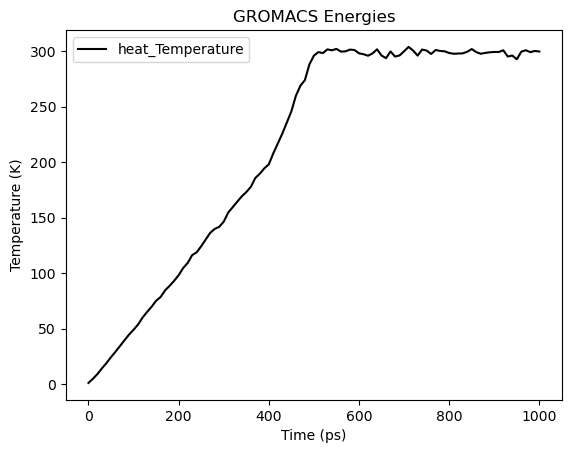

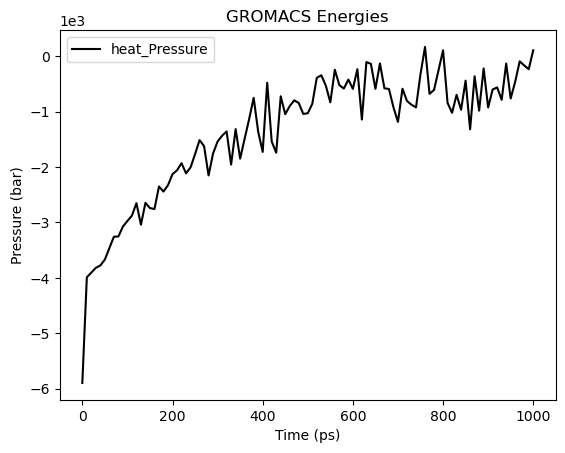

In [7]:
plot("heat.t.xvg")
plot("heat.p.xvg")

### pressure changing of nvt1
select 17 (Pressure)

In [8]:
!echo "15" | gmx energy -f nvt1.edr -o nvt1.t.xvg 
!echo "17" | gmx energy -f nvt1.edr -o nvt1.p.xvg 

                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /home/user/opt/gromacs-2023/bin/gmx
Data prefix:  /home/user/opt/gromacs-2023
Working dir:  /home/user/workfolder/g4dna_protocol/hybrid-ii/c.gromacs.run_md/1.create_system
Command line:
  gmx energy -f nvt1.edr -o nvt1.t.xvg

Opened nvt1.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Temperature     16  Pres.-DC      
 17  Pressure        18  Constr.-rmsd    19  Vir-XX          20  Vir-XY        
 21  Vir-XZ  

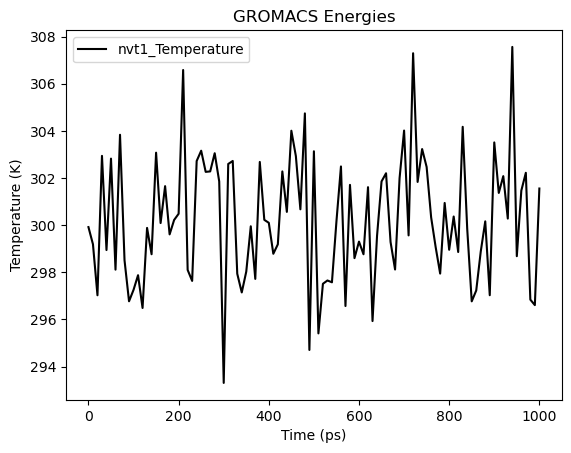

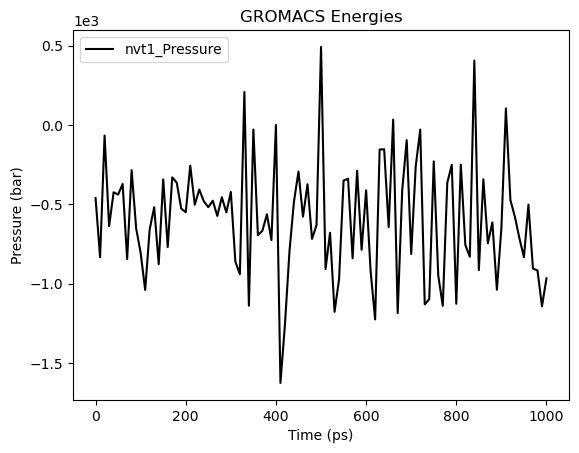

In [9]:
plot("nvt1.t.xvg")
plot("nvt1.p.xvg")

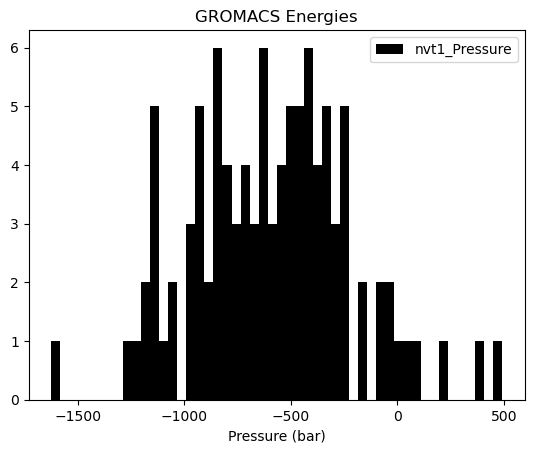

In [10]:
distribution("nvt1.p.xvg")

### pressure fixed and volume changing of npt
select 17(Pressure)  
select 23(Density)

In [11]:
!echo "15" | gmx energy -f npt1.edr -o npt1.t.xvg 
!echo "17" | gmx energy -f npt1.edr -o npt1.p.xvg 
!echo "23" | gmx energy -f npt1.edr -o npt1.d.xvg 
!echo "14" | gmx energy -f npt2.edr -o npt2.t.xvg 
!echo "16" | gmx energy -f npt2.edr -o npt2.p.xvg 
!echo "22" | gmx energy -f npt2.edr -o npt2.d.xvg 

                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /home/user/opt/gromacs-2023/bin/gmx
Data prefix:  /home/user/opt/gromacs-2023
Working dir:  /home/user/workfolder/g4dna_protocol/hybrid-ii/c.gromacs.run_md/1.create_system
Command line:
  gmx energy -f npt1.edr -o npt1.t.xvg

Opened npt1.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Temperature     16  Pres.-DC      
 17  Pressure        18  Constr.-rmsd    19  Box-X           20  Box-Y         
 21  Box-Z   

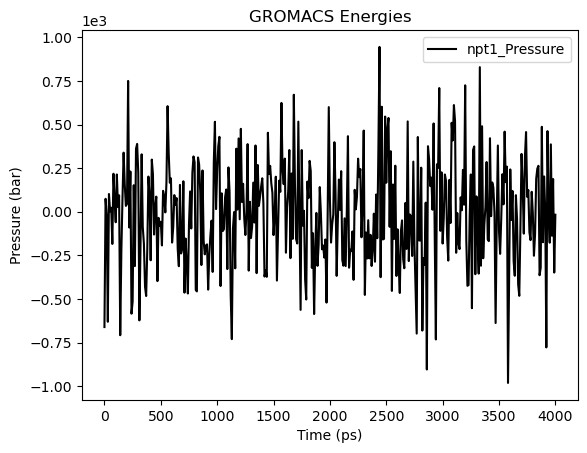

In [12]:
plot("npt1.p.xvg")

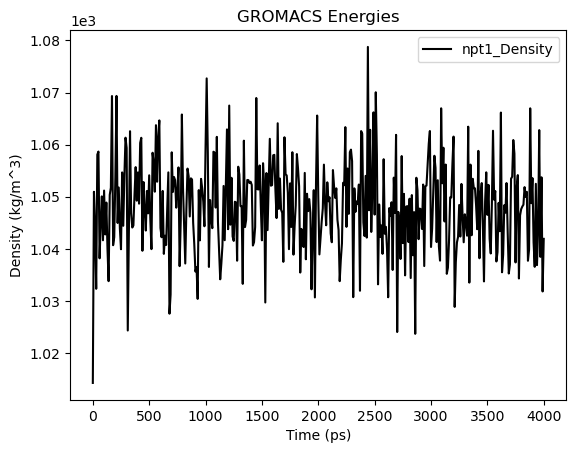

In [13]:
plot("npt1.d.xvg")

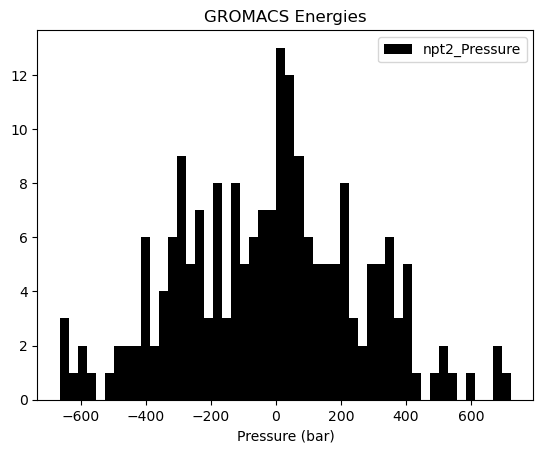

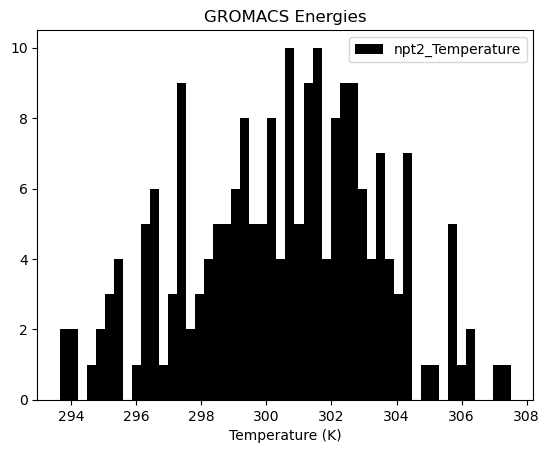

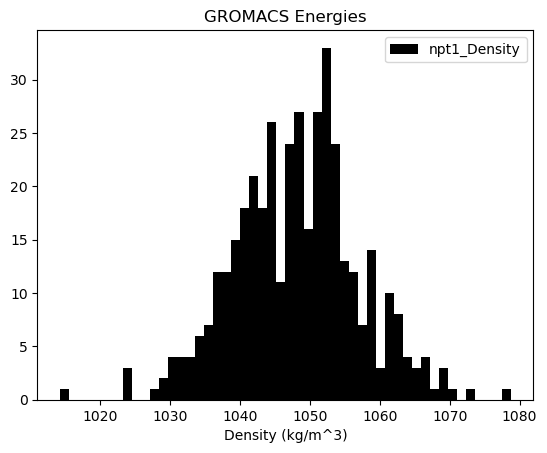

In [14]:
distribution("npt2.p.xvg")
distribution("npt2.t.xvg")
distribution("npt1.d.xvg")

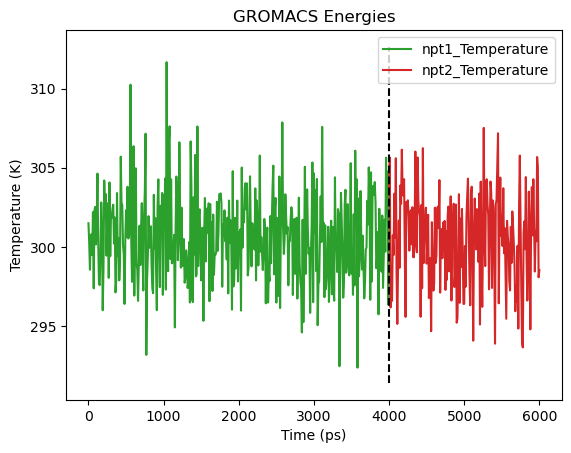

In [15]:
plt.plot([],[])
plt.plot([],[])
plot("npt1.t.xvg","npt2.t.xvg")

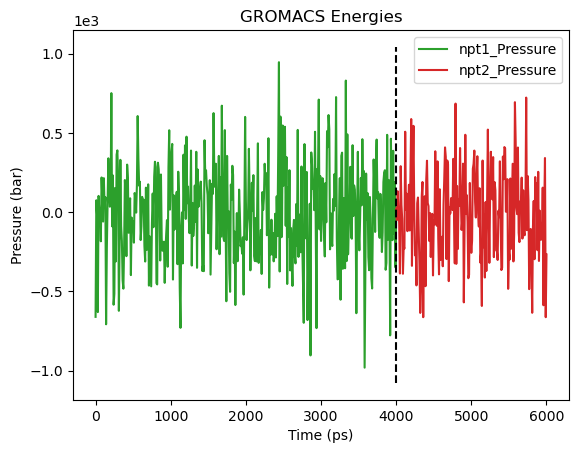

In [16]:
plt.plot([],[])
plt.plot([],[])
plot("npt1.p.xvg","npt2.p.xvg")

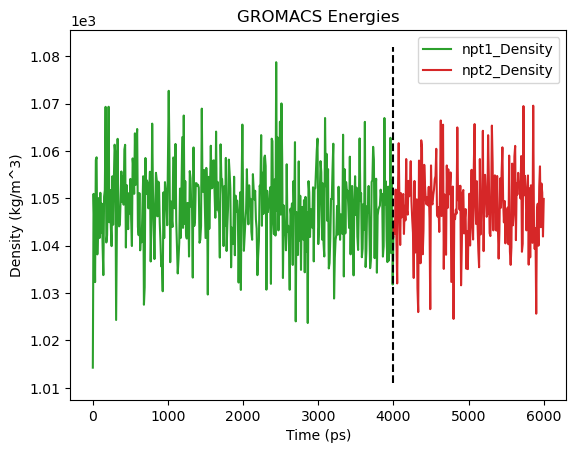

In [17]:
plt.plot([],[])
plt.plot([],[])
plot("npt1.d.xvg","npt2.d.xvg")

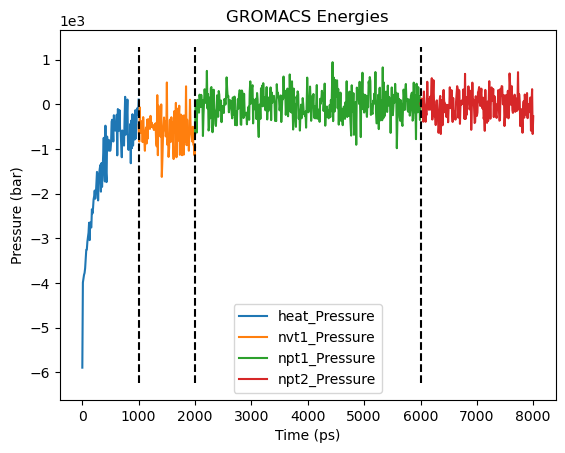

In [18]:
plot("heat.p.xvg","nvt1.p.xvg","npt1.p.xvg","npt2.p.xvg")

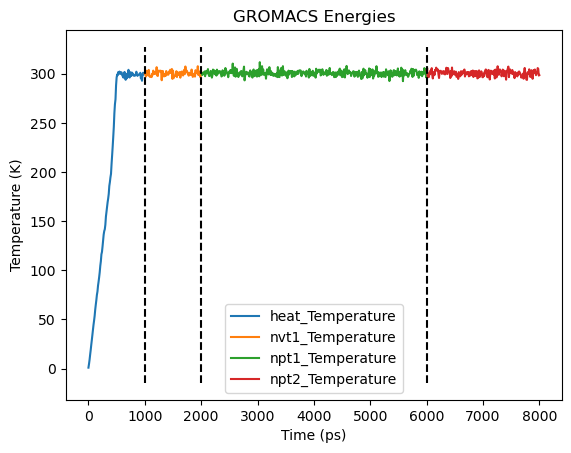

In [19]:
plot("heat.t.xvg","nvt1.t.xvg","npt1.t.xvg","npt2.t.xvg")